# Customer Next Transaction Prediction

Customer Next Transaction Prediction refers to the process of using data analysis and predictive modeling techniques to forecast or predict when a customer is likely to make their next transaction or purchase. It is a common application in customer relationship management (CRM) and marketing strategies, aimed at improving customer retention, engagement, and personalization.

By analyzing historical customer transaction data, such as purchase history, frequency, recency, monetary value, and other relevant variables, predictive models can be trained to identify patterns and predict the likelihood and timing of future transactions. These models may employ various machine learning algorithms, such as regression, decision trees, random forests, or more advanced techniques like neural networks.

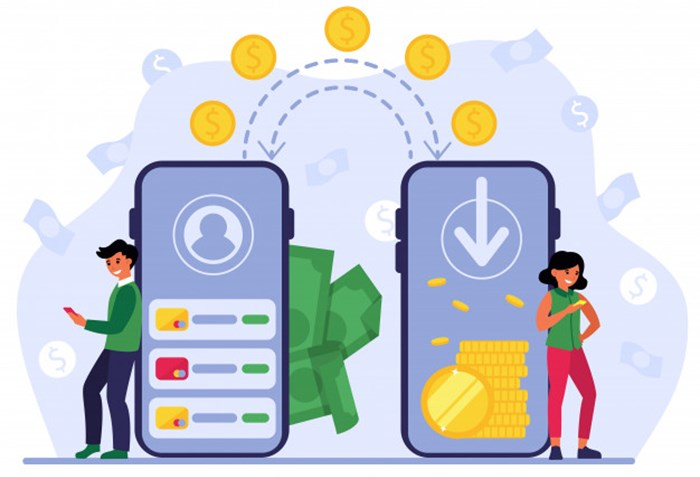

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,train_test_split,GridSearchCV,cross_validate
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score
from sklearn.cluster import KMeans
# from multiscorer import MultiScorer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
df=pd.read_csv('/content/online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [148]:
df.shape

(1067371, 8)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [150]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [151]:
df.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [152]:
df_data = df.dropna()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   UnitPrice    824364 non-null  float64
 6   CustomerID   824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [154]:
# Handle negative quantity
df_data = df_data.loc[df['Quantity'] > 0]
# Let's check negative records
df_data[df_data['Quantity'] < 0]
df_data = df_data.loc[df_data['UnitPrice'] > 0]
# Let's check negative records
df_data[df_data['UnitPrice'] < 0]
df_data = df_data.loc[df_data['InvoiceDate'] < '2011-12-01']


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400'),
  Text(450.0, 0, '450')])

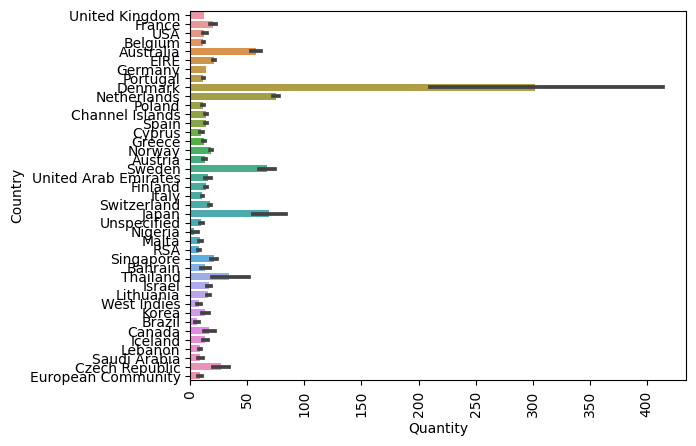

In [158]:
sns.barplot(y='Country',x='Quantity',data=df_data)
plt.xticks(rotation=90)

In [159]:
df_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [160]:
df_data['Country'].value_counts()

United Kingdom          709449
Germany                  16377
EIRE                     15424
France                   13487
Netherlands               5002
Spain                     3654
Switzerland               3011
Belgium                   2974
Portugal                  2345
Australia                 1812
Channel Islands           1564
Italy                     1460
Norway                    1363
Sweden                    1318
Cyprus                    1155
Finland                   1019
Austria                    915
Denmark                    787
Greece                     621
Unspecified                521
Poland                     512
Japan                      485
United Arab Emirates       383
USA                        377
Singapore                  339
Israel                     322
Malta                      282
Iceland                    242
Canada                     228
Lithuania                  189
RSA                        122
Brazil                      94
Thailand

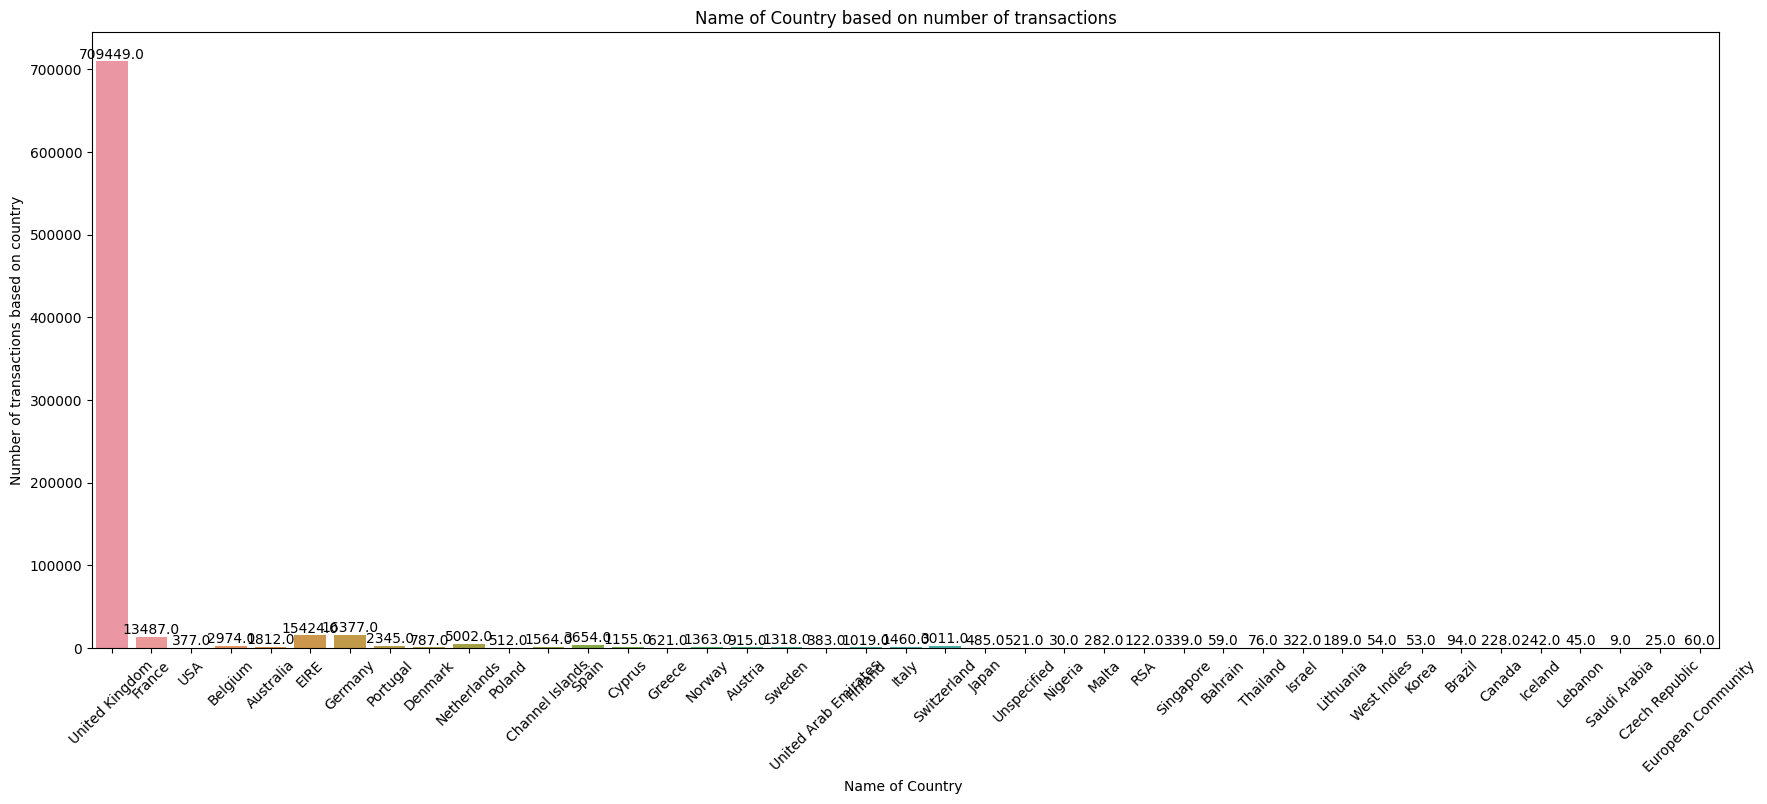

In [161]:
plt.figure(figsize=(21,8))
plot=sns.countplot(x='Country',data=df_data)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title('Name of Country based on number of transactions')
plt.xlabel('Name of Country ')
plt.ylabel('Number of transactions based on country')
plt.xticks(rotation=45)
plt.show()

In [162]:
df_data['InvoiceDate'] =pd.to_datetime(df_data['InvoiceDate'])
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [163]:
pd.DataFrame(df_data.InvoiceDate.describe())

<ipython-input-163-197e6ca92d17>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,InvoiceDate
count,788244
unique,33880
top,2011-11-14 15:27:00
freq,542
first,2009-12-01 07:45:00
last,2011-11-30 17:37:00


From the above, we see that the online purchases made by customers was from 2009-12-01 to 2011-12-09.

In the subsequent cells, we will answer some questions we would like to know from the given dataset.

## Exploration Question 1
#How many online customers are there in the dataset and what is their country of origin?

In [164]:
number_of_custmers=df_data['CustomerID'].nunique()
number_of_countries=df_data['Country'].nunique()

In [165]:
print(f' There are  total number of  {number_of_custmers}  customers  from {number_of_countries}  countries')

 There are  total number of  5850  customers  from 41  countries


## Exploration Question 2
# What are the countries that are most represented in the dataset?

In [166]:
count_country=df['Country'].value_counts()
count_country.index

Index(['United Kingdom', 'EIRE', 'Germany', 'France', 'Netherlands', 'Spain',
       'Switzerland', 'Belgium', 'Portugal', 'Australia', 'Channel Islands',
       'Italy', 'Norway', 'Sweden', 'Cyprus', 'Finland', 'Austria', 'Denmark',
       'Unspecified', 'Greece', 'Japan', 'Poland', 'USA',
       'United Arab Emirates', 'Israel', 'Hong Kong', 'Singapore', 'Malta',
       'Iceland', 'Canada', 'Lithuania', 'RSA', 'Bahrain', 'Brazil',
       'Thailand', 'Korea', 'European Community', 'Lebanon', 'West Indies',
       'Bermuda', 'Nigeria', 'Czech Republic', 'Saudi Arabia'],
      dtype='object')

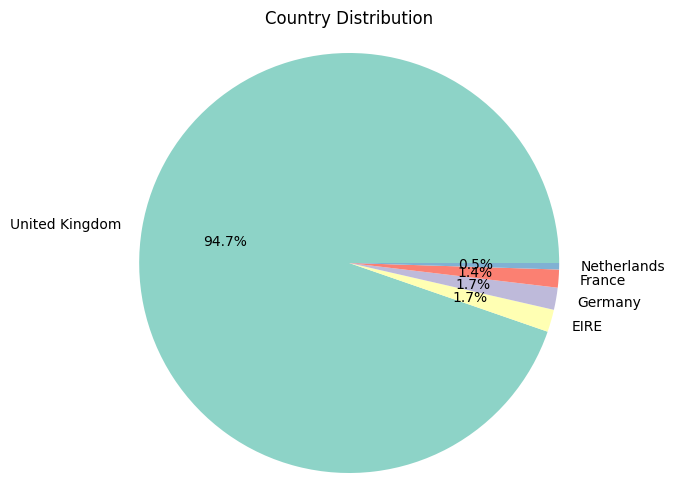

In [167]:
top_5_countries = count_country.head(5)
plt.figure(figsize=(8, 6))
sns.set_palette("Set3") 
plt.xticks(rotation=90)
plt.pie(top_5_countries, labels=top_5_countries.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Country Distribution')
plt.xticks(rotation=45)
plt.show()

The output above, shows the top 5
 countries of that purchase from the online retail shop with the United Kingdom being the country with the highest customers. They represent about 95.5%
 of the entire online customers.

## Exploration Question 3
#Calculate the revenue that was made in each month and what is the percentage revenue based on countries?

In [168]:
df_data['InvoiceYearMonth'] = df_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912


In [169]:
df_data['revenue']=df_data.Quantity*df_data.UnitPrice

In [170]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0


In [171]:
ctm_revenue=df_data.groupby('InvoiceYearMonth')['revenue'].sum().reset_index()
ctm_revenue

,InvoiceYearMonth,revenue
0,200912,686654.160
1,201001,557319.062
2,201002,506371.066
3,201003,699608.991
4,201004,594609.192
5,201005,599985.790
6,201006,639066.580
7,201007,591636.740
8,201008,604242.650
9,201009,831615.001


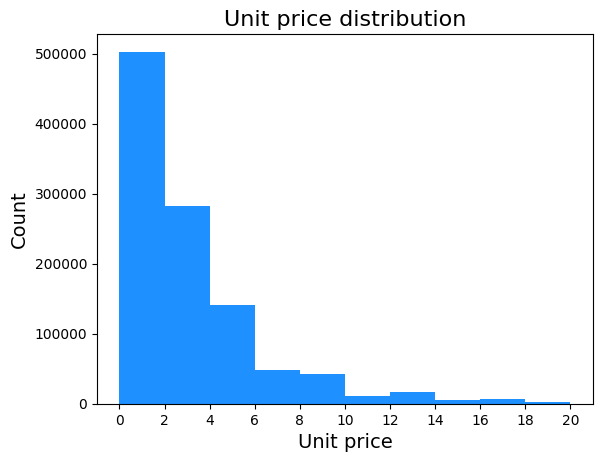

In [172]:
bins = np.arange(0, 21, 2)
ticks = np.arange(0, 21, 2)
plt.hist(data=df, x='UnitPrice', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16);

<Axes: xlabel='revenue', ylabel='Country'>

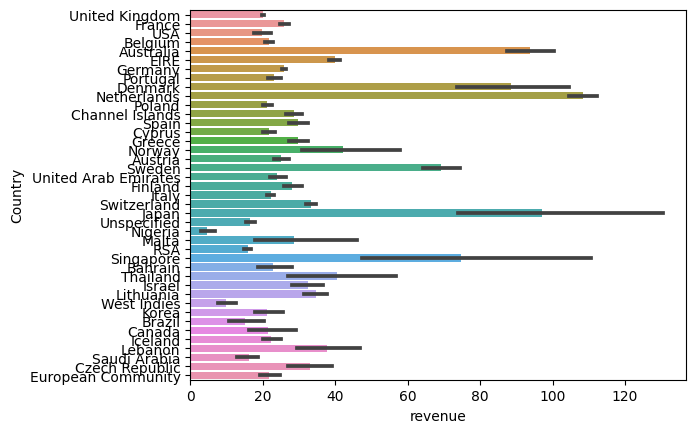

In [173]:
sns.barplot(y="Country",x="revenue",data=df_data)

In [174]:
revenue_by_country = df_data.groupby('Country')['revenue'].sum()
revenue_percentage = round((revenue_by_country / revenue_by_country.sum() * 100),2)
sorted_countries = revenue_percentage.sort_values(ascending=False)
top_5_countries = sorted_countries.head(5)


In [175]:
pd.DataFrame(top_5_countries)

,revenue
Country,
United Kingdom,82.73
EIRE,3.57
Netherlands,3.15
Germany,2.46
France,2.02


([<matplotlib.patches.Wedge at 0x7f8dc9dc0970>,
 [Text(-1.0237209319272218, 0.40248658801761406, 'United Kingdom'),
  Text(0.8889662627046981, -0.6478726601523186, 'EIRE'),
  Text(1.0109986417934238, -0.43345328040268954, 'Netherlands'),
  Text(1.074107787598579, -0.23726032247319814, 'Germany'),
  Text(1.0974904796291445, -0.07426067009790967, 'France')],
 [Text(-0.5583932355966664, 0.21953813891869856, '88.1%'),
  Text(0.4848906887480171, -0.35338508735581015, '3.8%'),
  Text(0.5514538046145947, -0.23642906203783062, '3.4%'),
  Text(0.5858769750537703, -0.12941472134901716, '2.6%'),
  Text(0.598631170706806, -0.040505820053405264, '2.2%')])

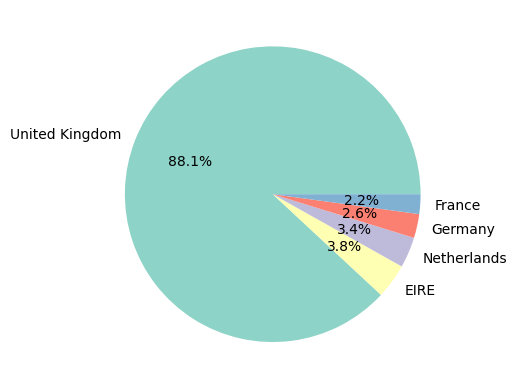

In [176]:
plt.pie(top_5_countries,labels=top_5_countries.index,autopct='%1.1f%%')

# Predicting Customer Purchase

The goal of this section is to come up with a make a model using the given dataframe df_data, to estimate if a given customer will buy something again from the online shop in the next quarter.

In [177]:
df_data.InvoiceDate.describe()

<ipython-input-177-0e4de0fb22da>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  788244
unique                  33880
top       2011-11-14 15:27:00
freq                      542
first     2009-12-01 07:45:00
last      2011-11-30 17:37:00
Name: InvoiceDate, dtype: object

In [178]:
df_data.shape

(788244, 10)

In [179]:


# Convert 'InvoiceDate' column to datetime
df_data['InvoiceDate'] = pd.to_datetime(df_data['InvoiceDate'])

# Find the maximum date
max_date = df_data['InvoiceDate'].max()

# Calculate recency
df_data['Recency'] = (max_date - df_data['InvoiceDate']).dt.days

# Calculate frequency (number of purchases) for each customer
df_data['Frequency'] = df_data.groupby('CustomerID')['InvoiceNo'].transform('count')

# Calculate total revenue for each customer
df_data['revenue'] = df_data['Quantity'] * df_data['UnitPrice']
# Group by 'CustomerID' and aggregate the features
customer_data = df_data.groupby('CustomerID').agg({
    'Recency': 'min',
    'Frequency': 'max',
    'revenue': 'sum'
}).reset_index()



In [180]:
customer_data

,CustomerID,Recency,Frequency,revenue
0,12346.0,316,34,77556.46
1,12347.0,30,242,5408.50
2,12348.0,66,51,2019.40
3,12349.0,9,175,4428.69
4,12350.0,301,17,334.40
...,...,...,...,...
5845,18283.0,0,936,2528.65
5846,18284.0,422,28,461.68
5847,18285.0,651,12,427.00
5848,18286.0,467,67,1296.43


In [181]:
highest_revenue = customer_data.loc[customer_data['revenue'].sort_values(ascending=False).index]
high_rev=highest_revenue.head(10)
high_rev


,CustomerID,Recency,Frequency,revenue
5664,18102.0,2,1035,597336.11
2263,14646.0,7,3763,516874.50
1776,14156.0,0,4048,313946.37
2523,14911.0,0,10926,288993.71
5026,17450.0,1,419,245410.69
1319,13694.0,16,1502,193351.65
5085,17511.0,7,1838,168224.23
67,12415.0,15,926,144458.37
4272,16684.0,2,689,141740.79
2670,15061.0,1,972,133922.66


# EDA
Revenue generated by customers in BarPlot

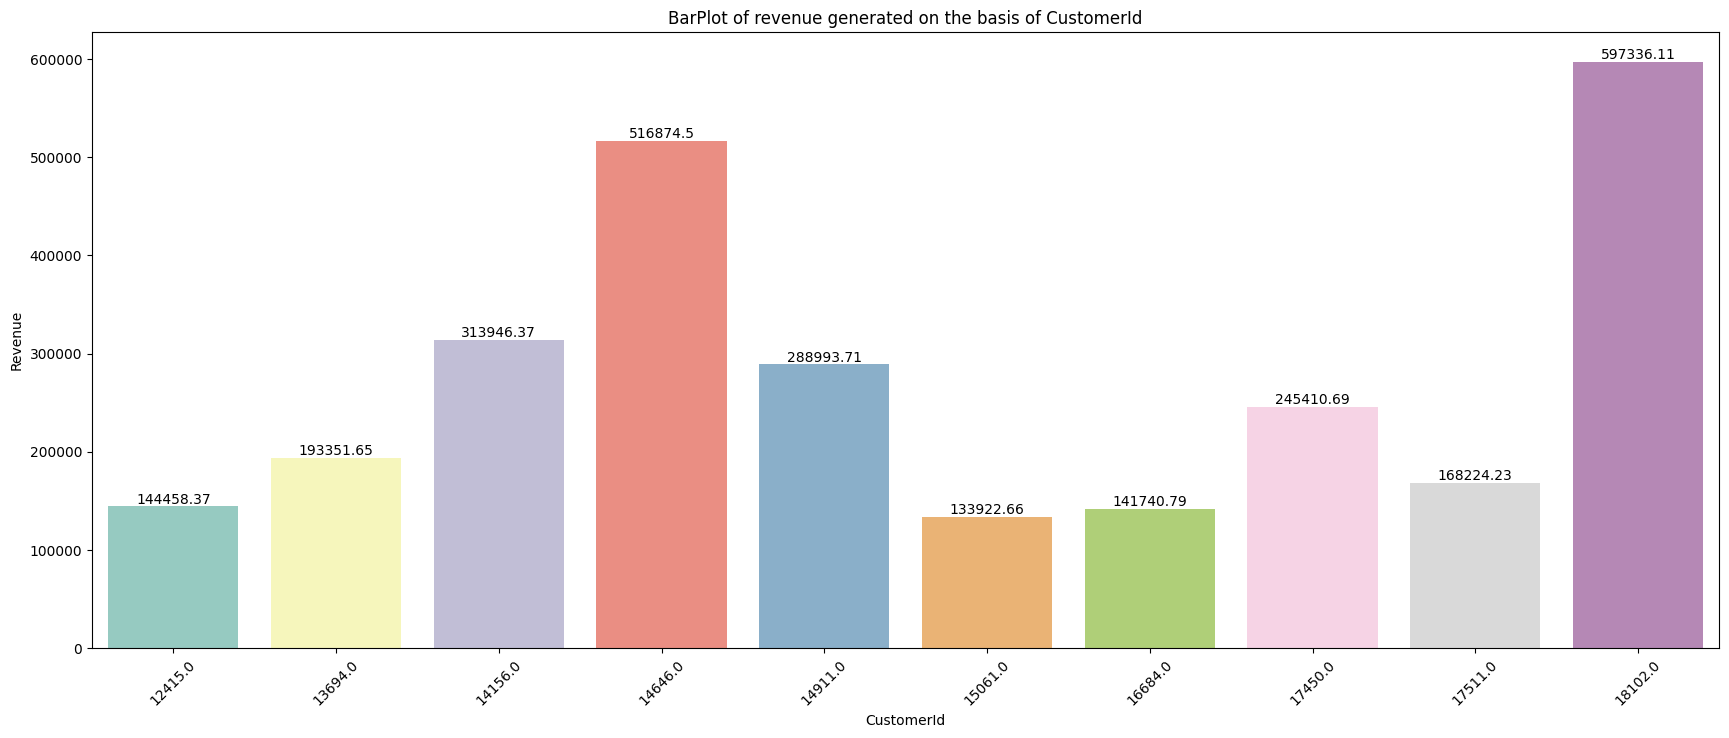

In [182]:
plt.figure(figsize=(21,8))
plot=sns.barplot(x="CustomerID",y="revenue",data=high_rev)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title("BarPlot of revenue generated on the basis of CustomerId")
plt.xlabel("CustomerId")
plt.ylabel("Revenue")
plt.show()

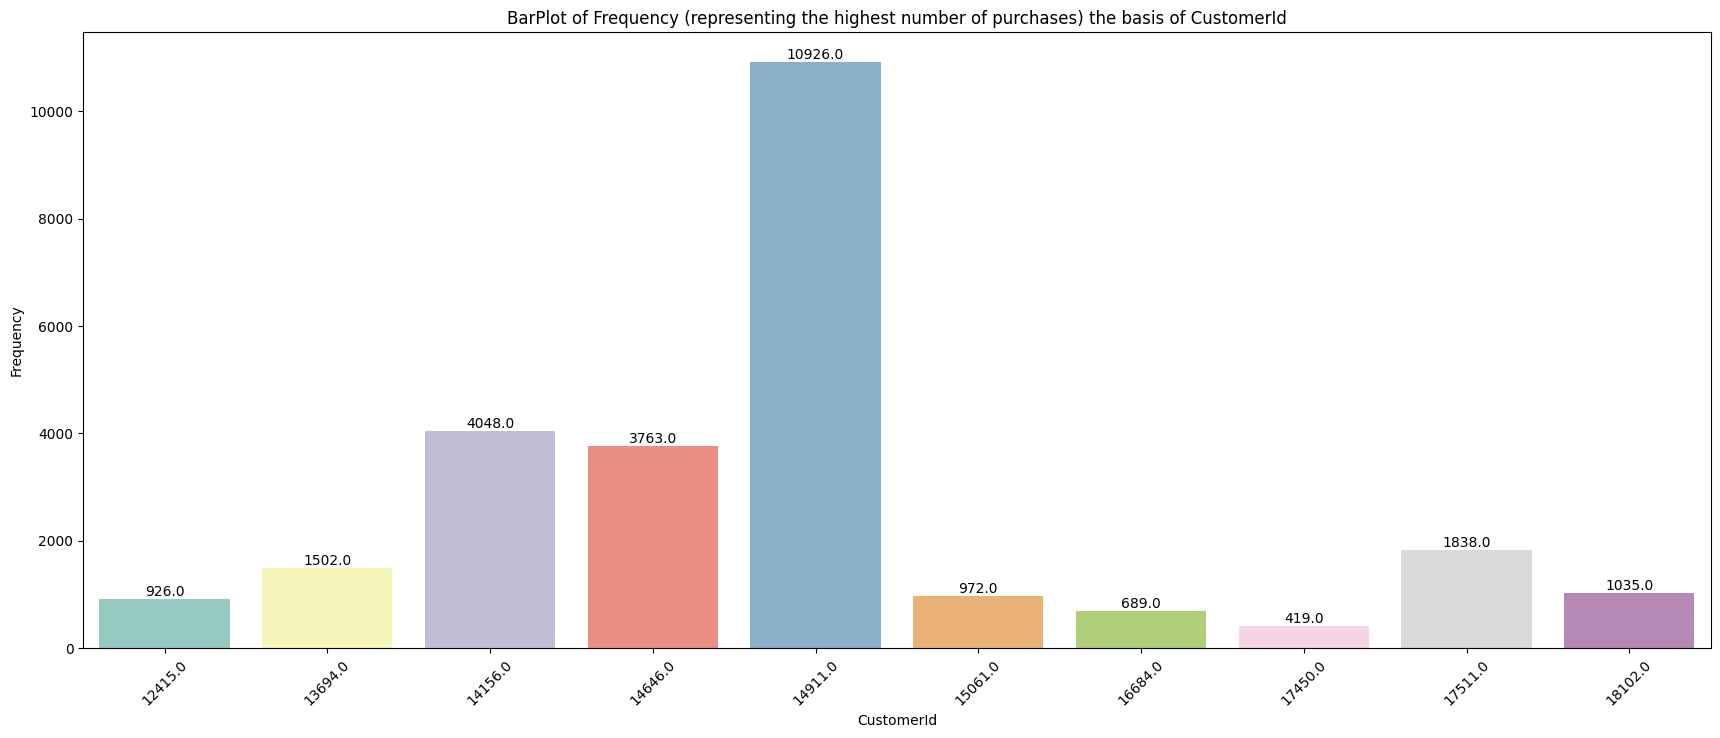

In [183]:
plt.figure(figsize=(21,8))
plot=sns.barplot(x="CustomerID",y="Frequency",data=high_rev)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title("BarPlot of Frequency (representing the highest number of purchases) the basis of CustomerId")
plt.xlabel("CustomerId")
plt.ylabel("Frequency")
plt.show()

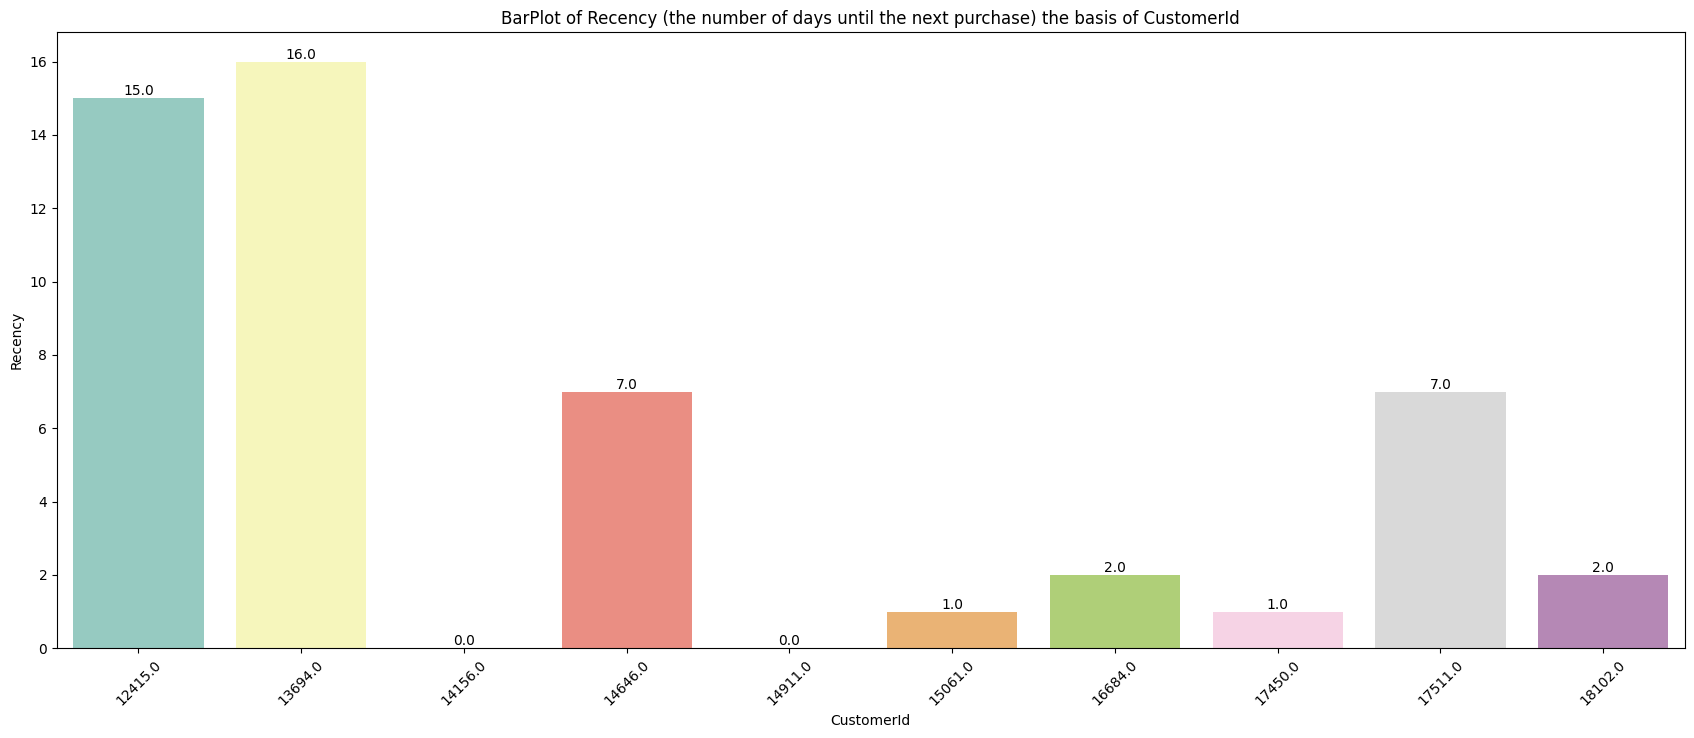

In [184]:
plt.figure(figsize=(21,8))
plot=sns.barplot(x="CustomerID",y="Recency",data=high_rev)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title("BarPlot of Recency (the number of days until the next purchase) the basis of CustomerId")
plt.xlabel("CustomerId")
plt.ylabel("Recency")
plt.show()

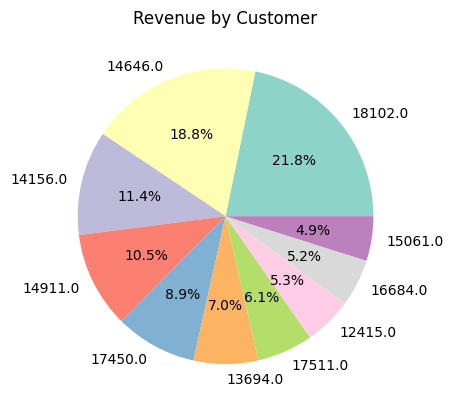

In [185]:
customer_revenue = df_data.groupby('CustomerID')['revenue'].sum()
customer_revenue = customer_revenue.sort_values(ascending=False).head(10)
plt.pie(customer_revenue, labels=customer_revenue.index, autopct='%1.1f%%')
plt.title('Revenue by Customer')
plt.show()

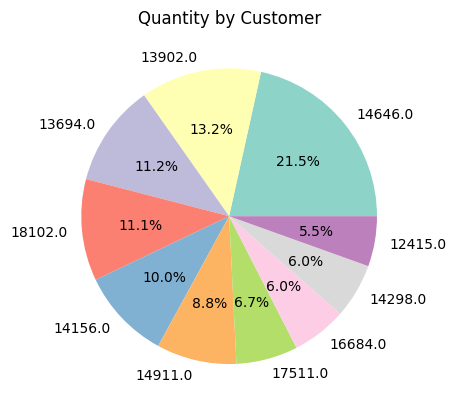

In [186]:
customer_quantity = df_data.groupby('CustomerID')['Quantity'].sum()
customer_quantity = customer_quantity.sort_values(ascending=False).head(10)
plt.pie(customer_quantity, labels=customer_quantity.index, autopct='%1.1f%%')
plt.title('Quantity by Customer')
plt.show()

In [193]:
# Split the data into training and test sets
X = customer_data[['Recency', 'revenue']]
y = customer_data['Frequency']  # Predicting the number of future purchases

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(model.score(X_test,y_test))
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

# Predict the next purchase for a new customer
new_customer_data = pd.DataFrame({
    'Recency': [30],  # Recency in days
    'revenue': [500]  #  Total spending
})

next_purchase_prediction = model.predict(new_customer_data)
print(f"Predicted next purchase: {next_purchase_prediction[0]:.2f}")


0.017094017094017096
Mean Squared Error: 316998.77
Predicted next purchase: 13.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

